In [150]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



In [152]:
df = pd.read_csv('C:/USERS/YASHN/SALES CHANNEL.CSV')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [153]:
df = df.drop("Unnamed: 0", axis=1)

In [154]:
# Checking the null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [156]:
# Statistical Summary
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [157]:
# Checking the dimensions
df.shape

(200, 4)

In [158]:
#Checking the skewness
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

There is no such skewness present in the data

In [159]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'radio'}>,
        <AxesSubplot:title={'center':'newspaper'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

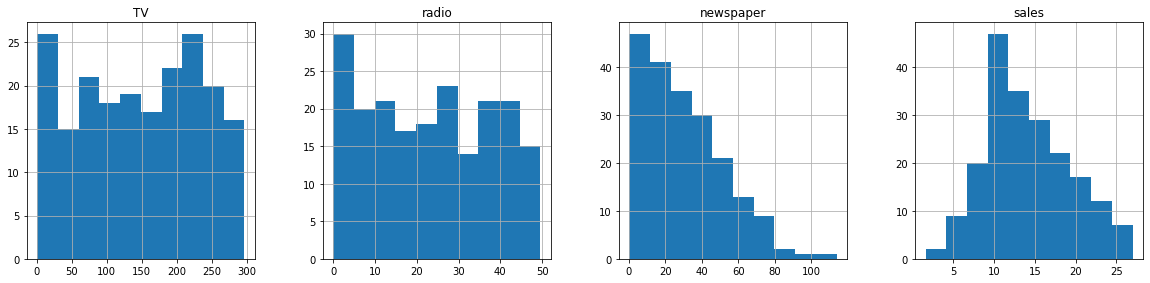

In [160]:
# Data Visualisation
# plotting histogram
df.hist(figsize = (20,10), layout = (2,4))

<AxesSubplot:>

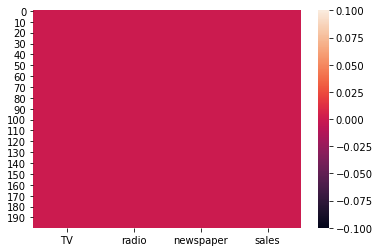

In [127]:
# plotting heatmap
sns.heatmap(df.isnull())

In [128]:
# Checking Correlation
df.corr()


,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


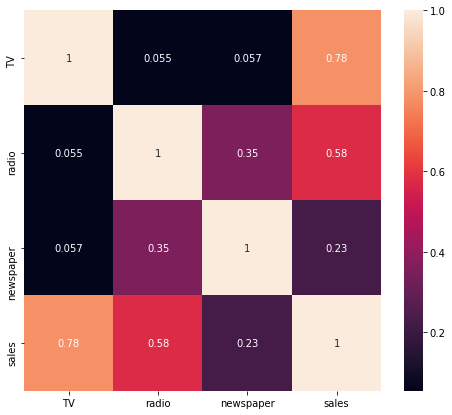

In [129]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

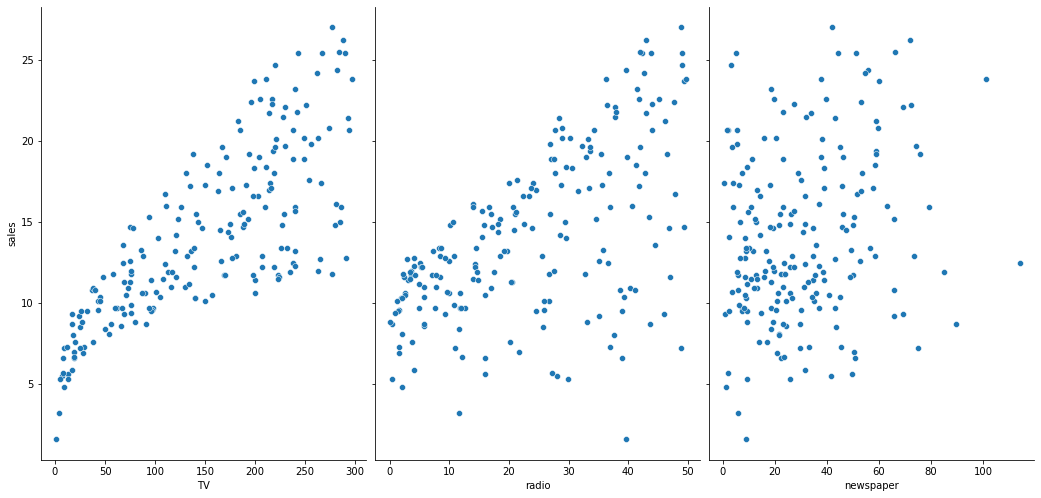

In [130]:
# Checking the relation betweeen sales and other variables
sns.pairplot(df, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.7);

As per the  correlation heatmap and the scatterplot, the variable TV seems to be most correlated with Sales

<AxesSubplot:xlabel='TV', ylabel='Density'>

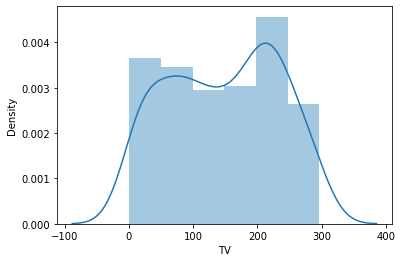

In [131]:
sns.distplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

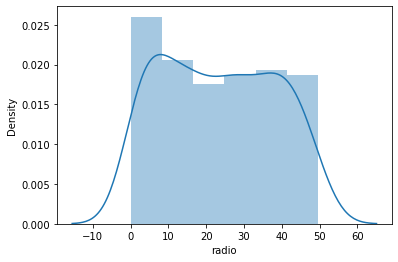

In [132]:
sns.distplot(df['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

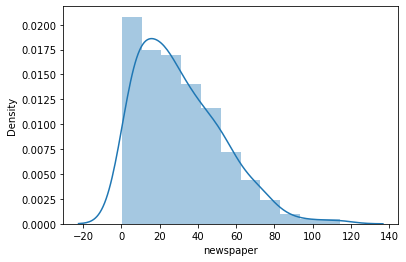

In [133]:
sns.distplot(df['newspaper'])

<AxesSubplot:xlabel='sales', ylabel='Density'>

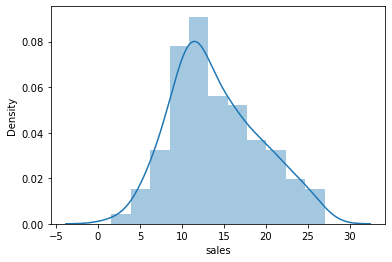

In [134]:
sns.distplot(df['sales'])

As per above graphs, we can see all the columns are normally distributed

In [29]:
# Checking the relation betwen sales and other variables 

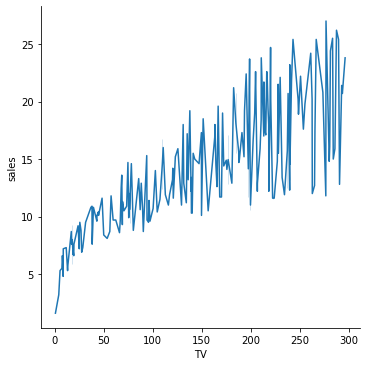

In [82]:
sns.relplot(x="TV", y="sales", kind="line", data=df)

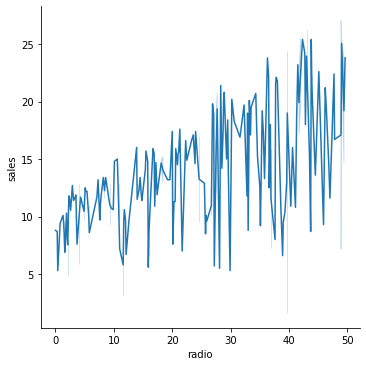

In [83]:
sns.relplot(x="radio", y="sales", kind="line", data=df)

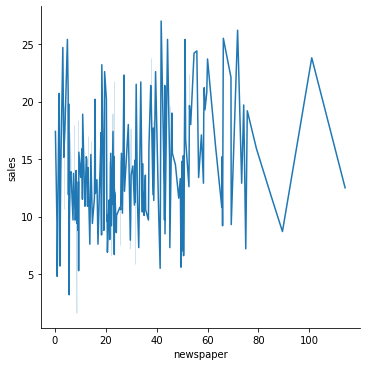

In [84]:
sns.relplot(x="newspaper", y="sales", kind="line", data=df)

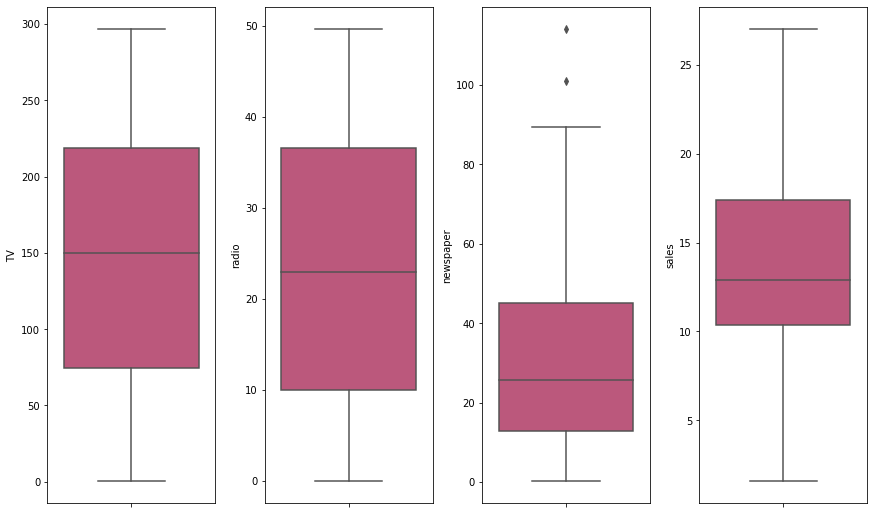

In [85]:
# checking outliers
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.2, w_pad=0.9, h_pad=5.0)
plt.show()

There are no considerable outliers present in the data.

In [86]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['sales']=LE.fit_transform(df['sales'])
df['sales'].value_counts()

27     5
54     4
74     4
43     4
99     3
      ..
59     1
58     1
56     1
52     1
120    1
Name: sales, Length: 121, dtype: int64

In [87]:
LE = LabelEncoder()
for column in df.columns:
    df[column] = LE.fit_transform(df[column])

In [89]:
df.head()

,TV,radio,newspaper,sales
0,153,131,159,106
1,32,136,124,31
2,12,156,160,23
3,98,142,149,89
4,112,41,148,54


In [90]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.06202323e+00, 1.00388046e+00, 1.56173231e+00, 1.50166059e+00],
       [1.15893789e+00, 1.10532351e+00, 8.42749989e-01, 8.14287264e-01],
       [1.52603890e+00, 1.51109573e+00, 1.58227466e+00, 1.06132170e+00],
       [5.24954446e-02, 1.22705518e+00, 1.35630879e+00, 9.76712406e-01],
       [3.09466152e-01, 8.22094507e-01, 1.33576644e+00, 1.04063257e-01],
       [1.61781416e+00, 1.65311600e+00, 1.68498642e+00, 1.40099405e+00],
       [1.04880759e+00, 5.98108245e-01, 1.43282905e-01, 4.12856303e-01],
       [3.32960617e-01, 2.74302017e-01, 9.44434631e-01, 7.31839520e-02],
       [1.63616921e+00, 1.45104144e+00, 1.66341695e+00, 1.70978710e+00],
       [5.48081810e-01, 1.39017561e+00, 3.28164072e-01, 7.52528655e-01],
       [9.93742437e-01, 1.12642367e+00, 1.02198201e-01, 1.18483892e+00],
       [7.49987366e-01, 5.03157546e-02, 1.47853578e+00, 8.22315883e-01],
       [1.41590860e+00, 7.80705741e-01, 1.52064760e+00, 1.09220101e+00],
       [5.16511123e-01, 1.06555784e+00, 1.27311226e

In [91]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [92]:
# Splitting the dataset
X = df.drop('sales', axis=1)
Y = df['sales']

In [93]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

,TV,radio,newspaper
0,1.062023,1.003880,1.561732
1,-1.158938,1.105324,0.842750
2,-1.526039,1.511096,1.582275
3,0.052495,1.227055,1.356309
4,0.309466,-0.822095,1.335766
...,...,...,...
195,-1.232358,-1.288733,-0.800638
196,-0.589931,-1.227867,-1.232028
197,0.291111,-0.943826,-1.293655
198,1.575965,1.287921,1.541190


In [94]:
Y

0      106
1       31
2       23
3       89
4       54
      ... 
195     14
196     27
197     53
198    118
199     57
Name: sales, Length: 200, dtype: int64

In [95]:
# Creating Training and Testing Dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

In [96]:
X_train.shape

(160, 3)

In [97]:
Y_train.shape

(160,)

In [98]:
X_test.shape

(40, 3)

In [99]:
Y_test.shape

(40,)

In [100]:
def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    

In [101]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 9.911516258280095
R2 Score is: 92.67193552478948
Cross Validation Score: 89.84549696886566


In [161]:
# K Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 7.436396977031283
R2 Score is: 95.87490250214576
Cross Validation Score: 5.500000000000001


In [104]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 15.639693091617879
R2 Score is: 81.75408954836989
Cross Validation Score: 68.7258962909652


In [42]:
# Ada Boost Regressor
from sklearn.ensemble import AdaBoostRegressor
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 7.122785171609445
R2 Score is: 96.21549765928508
Cross Validation Score: 96.27332247436057


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [105]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
print("Test Accuracy: {}%".format(round(rf.score(X_test, Y_test)*100, 2)))

Test Accuracy: 5.0%


In [106]:
from sklearn.metrics import classification_report, confusion_matrix
lr = LogisticRegression()

# feeding the training set into the model
lr.fit(X_train, Y_train)

# predicting the results for the test set
y_pred = lr.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", lr.score(X_train, Y_train))
print("Testing accuracy :", lr.score(X_test, Y_test))

# classification report
print(classification_report(Y_test, y_pred))

# confusion matrix
print(confusion_matrix(Y_test, y_pred))

Training accuracy : 0.14375
Testing accuracy : 0.025
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         2
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         0
          30       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          33       0.00     

In [107]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(X_train, Y_train))
print("Testing accuracy :", model.score(X_test, Y_test))

Training accuracy : 1.0
Testing accuracy : 0.05


In [108]:
# classification report
print(classification_report(Y_test, y_pred))

# confusion matrix
print(confusion_matrix(Y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          27       1.00      0.50      0.67         2
          28       0.00      0.00      0.00         1
          29       0.00    

In [117]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators = 200)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(X_train, Y_train))
print("Testing accuracy :", model.score(X_test, Y_test))

Training accuracy : 1.0
Testing accuracy : 0.05


In [118]:
# classification report
print(classification_report(Y_test, y_pred))

# confusion matrix
print(confusion_matrix(Y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          27       0.67      1.00      0.80         2
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         0
          30       0.00    

In [119]:
from sklearn.svm import SVC

# creating the model
model = SVC()

# feeding the training set into the model
model.fit(X_train, Y_train)

# predicting the results for the test set
y_pred = model.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(X_train, Y_train))
print("Testing accuracy :", model.score(X_test, Y_test))

Training accuracy : 0.16875
Testing accuracy : 0.05


In [122]:
# classification report
print(classification_report(Y_test, y_pred))

# confusion matrix
print(confusion_matrix(Y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          27       0.14      0.50      0.22         2
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         0
          30       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          40       0.00    

In [163]:
# Ada Boost Regressor
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()



# feeding the training set into the model
model.fit(X_train, Y_train)

# predicting the results for the test set
y_pred = model.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(X_train, Y_train))
print("Testing accuracy :", model.score(X_test, Y_test))

Training accuracy : 0.9773222994269466
Testing accuracy : 0.9596267107171835


In [52]:
# classification report
print(classification_report(Y_test, y_pred))

# confusion matrix
print(confusion_matrix(Y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         2
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         0
          30       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          35       0.00    

From the above  models we can see that Ada Boost Regressor has the best accuracy score of 97%

In [177]:
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [179]:
# Use the random grid to search for best hyperparameters

regressor = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 

regressor_random = RandomizedSearchCV(estimator = regressor,
                                      param_distributions = random_grid,
                                      n_iter = 20,
                                      cv = 3,
                                      verbose=2,
                                      random_state=42,)

regressor_random.fit(X_train, Y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=377; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=377; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=377; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=3

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, verbose=2)

In [176]:
# Hyperparameter Tuning 
#Using Ada Boost Regressor
fmod_param = {'n_estimators' : [50, 100, 150, 200],
              'learning_rate' : [0.001, 0.01, 0.1, 1],
              'loss' : ["linear", "square", "exponential"],
              'random_state' : [21, 42, 104, 111]
             }


In [173]:
GSCV = GridSearchCV(AdaBoostRegressor(), fmod_param, cv=5)

In [174]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150, 200],
                         'random_state': [21, 42, 104, 111]})

In [175]:
GSCV.best_params_

{'learning_rate': 1, 'loss': 'square', 'n_estimators': 150, 'random_state': 42}

In [180]:
# Saving The Model
import pickle
file = 'Sales Channel'
#save file
save = pickle.dump(AdaBoostRegressor,open(file,'wb'))